##Convolutional neural network su FASHION MNIST

Convolutional neural network in TensorFlow 2.x su database FASHION MNIST.

In [14]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  print("Problem with TensorFlow version")
  pass

#tf.keras.backend.clear_session()  # For easy reset of notebook state.

print("Done")

Done


In [0]:
import tensorflow as tf

In [16]:
#import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.1.0


In [17]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Done")

Done


In [18]:
#Get the image shape
print(X_train.shape)#60000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)
print(X_test.shape)#10000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)

(60000, 28, 28)
(10000, 28, 28)


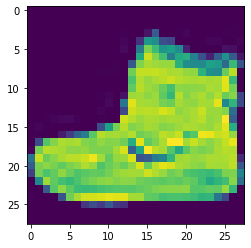

In [19]:
#Show the image as a picture
plt.imshow(X_train[0])

In [0]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [21]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [22]:
#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#Convolution layer to extract features from the input image, and create 64 channels of ReLu 3x3 convolved features (NOTE: Rectifier Linear Unit aka (ReLu))
model.add(Conv2D(32, kernel_size=3, activation='relu'))#Convolution layer to extract features from the input image, and create 32 channels of ReLu 3x3 convolved features
model.add(Flatten())#Flattening  layer makes the image a linear array or 1D Array or 1D Vector to feed into and connect with the neural network
model.add(Dense(10, activation='softmax'))# The neural network last layer with 10 neurons and activation function softmax, 10 neurons used because we have 10 labels

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [24]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.5927 - accuracy: 0.8382 - val_loss: 0.3996 - val_accuracy: 0.8547
Epoch 2/3
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.3327 - accuracy: 0.8810 - val_loss: 0.3664 - val_accuracy: 0.8681
Epoch 3/3
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.2790 - accuracy: 0.8975 - val_loss: 0.3594 - val_accuracy: 0.8781


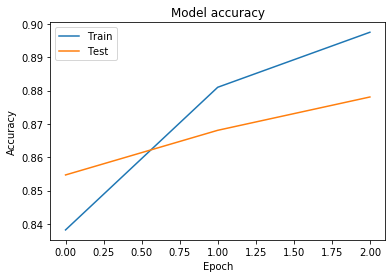

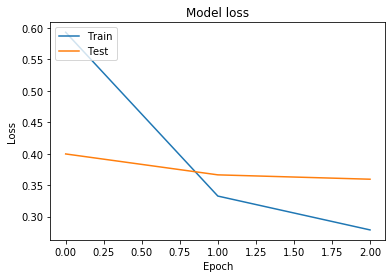

In [25]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test,  y_test_one_hot, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 7s - loss: 0.3594 - accuracy: 0.8781

Test accuracy: 0.8781


In [27]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[2.42672465e-10, 4.12851350e-12, 3.38191194e-12, 2.66645473e-11,
        9.05834963e-10, 1.85892768e-05, 4.68441330e-09, 5.91713797e-05,
        3.78548526e-10, 9.99922276e-01],
       [2.67832252e-06, 3.47455814e-10, 9.99851704e-01, 2.00401189e-07,
        1.39613432e-04, 2.45127551e-12, 5.73072111e-06, 1.68329894e-09,
        9.08259157e-09, 1.48659099e-10],
       [1.94229028e-06, 9.99928474e-01, 1.13454696e-07, 3.48606300e-05,
        3.26290065e-05, 3.21797238e-08, 1.98360976e-06, 1.44408416e-10,
        1.91751184e-08, 1.69207803e-09],
       [1.32064697e-08, 9.99965668e-01, 3.01878189e-10, 3.37543570e-05,
        5.92341848e-07, 4.74616735e-10, 9.47369649e-09, 1.09211314e-10,
        4.19173085e-10, 2.59280392e-11]], dtype=float32)

In [28]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:4])

[9 2 1 1]
[9 2 1 1]


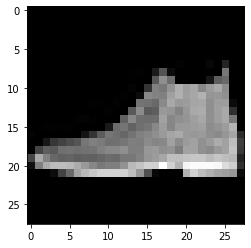

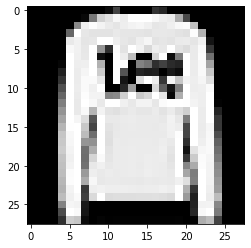

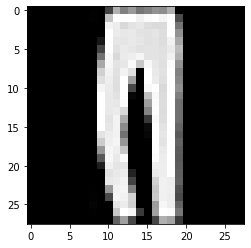

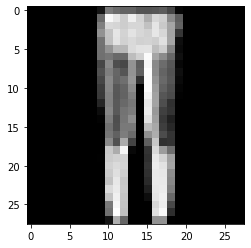

In [29]:
#Show the first 4 images as pictures
for i in range(0,4):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()